## Import Libraries

In [12]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

## Data Exploration & Preprocessing

In [3]:
# Load the dataset 
dataset = pd.read_csv('house_prices.csv')
# Display the first five rows
dataset.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [4]:
# Display the statistical summary
dataset.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [5]:
# Count all missing values in the dataset
print(dataset.isnull().sum())

# Remove all rows with missing values
dataset.dropna(inplace=True)

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64


In [6]:
# Remove any duplicated instances from the dataset
dataset.drop_duplicates(inplace=True)

In [7]:
# Get all the columns from the dataset 
columns = np.array(dataset.columns)

# Split the data into descriptive and target features
X = dataset[np.concatenate((columns[0:1], columns[2:]))]
Y = dataset['Price']

# Remove the "address" columns from X dataset
X = X.drop(['Address'], axis=1)

# Apply label-encoder to the remaining categorical variables
encoder = LabelEncoder()
X['City'] = encoder.fit_transform(X['City'])
X['State'] = encoder.fit_transform(X['State'])
X['County'] = encoder.fit_transform(X['County'])

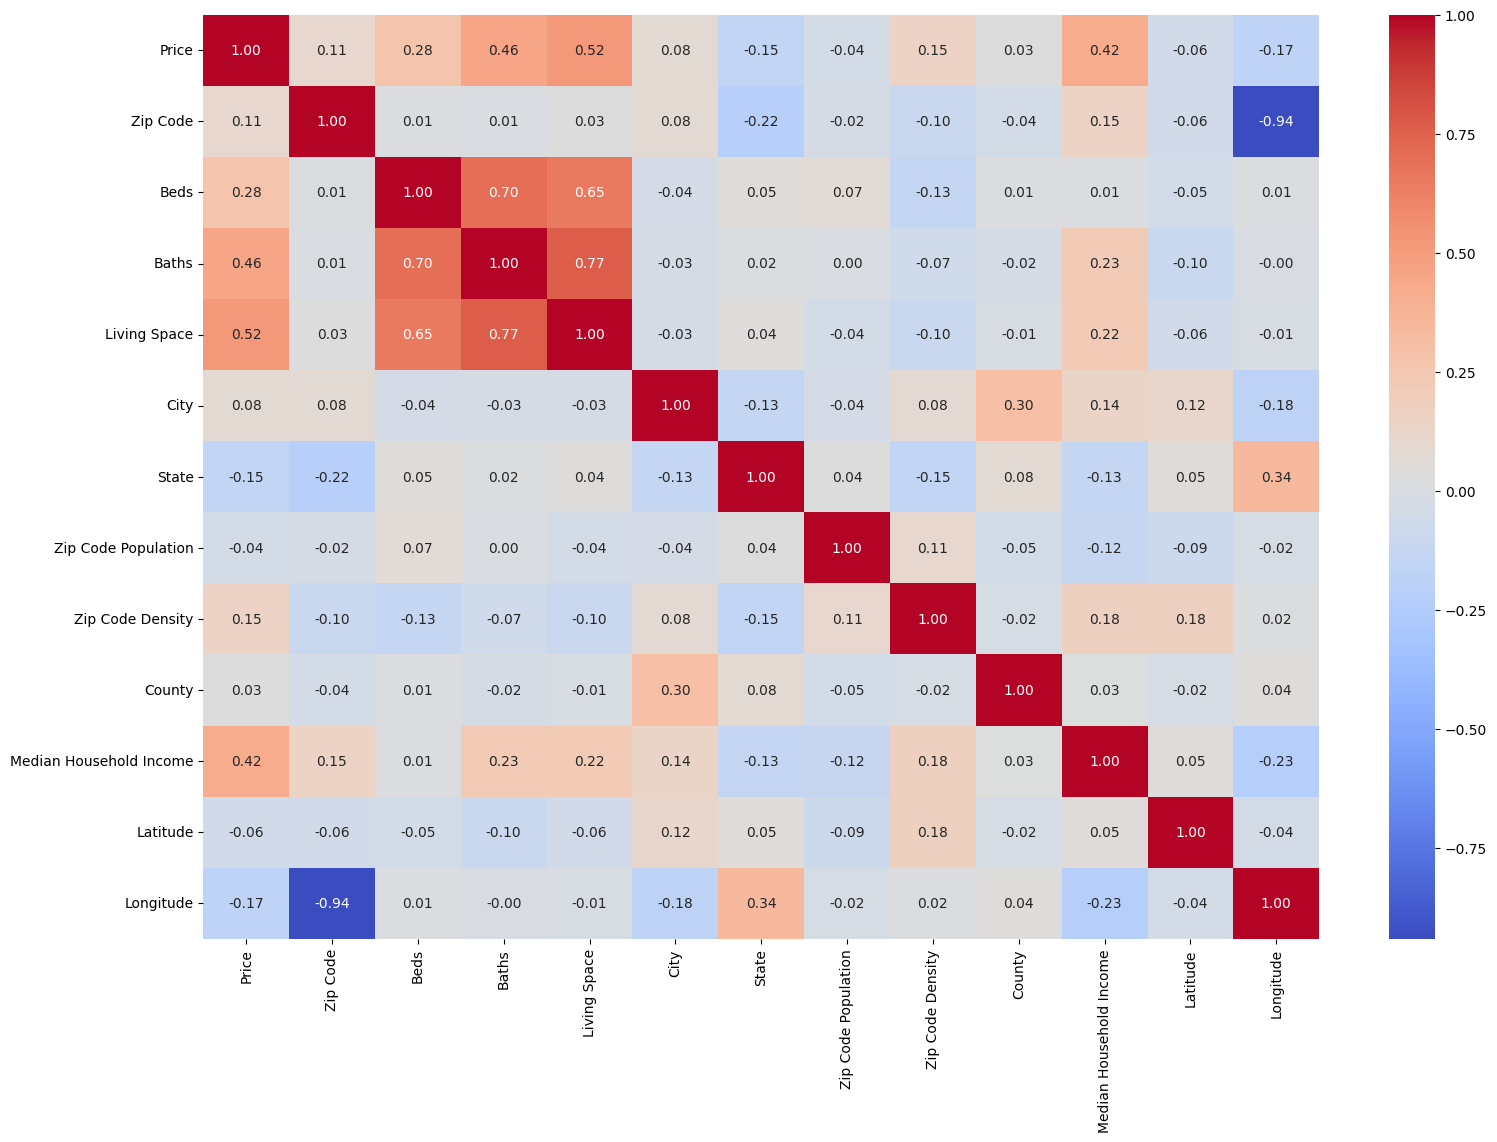

In [8]:
# Display the correlation matrix to see correlation
target = pd.DataFrame(Y)
temp = pd.concat([target, X], axis=1)

matrix = temp.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

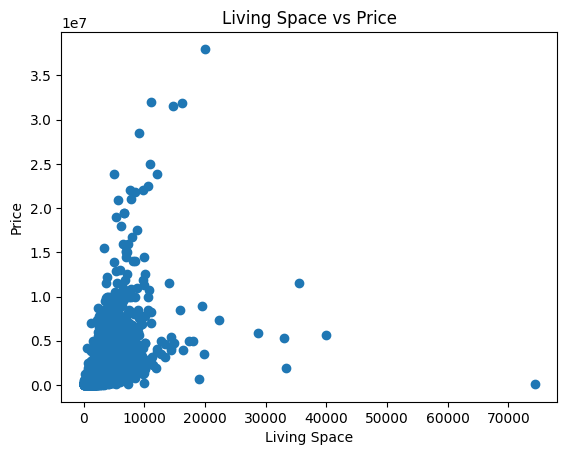

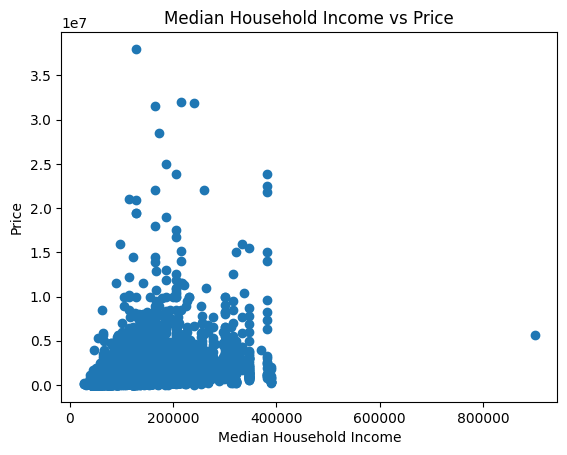

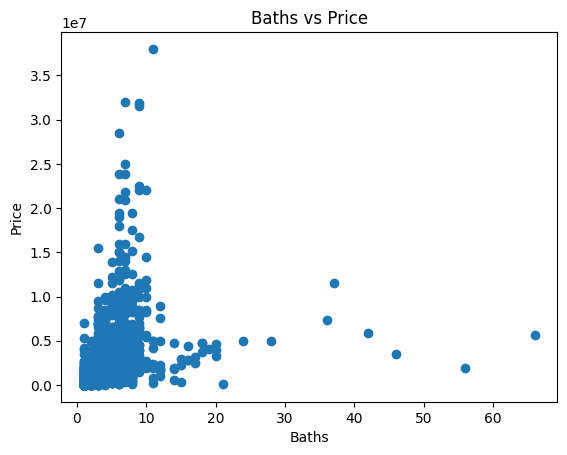

In [9]:
features = ["Living Space", "Median Household Income", "Baths"]
y_vals = np.array(Y)

for feature in features:
    x_vals = np.array(X[feature])
    plt.title("{} vs Price".format(feature))
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.scatter(x_vals, y_vals)
    plt.show()


## Insights from Scatter Plots
- **Living Space vs Price**
  - Some houses with larger living space do have higher price, but majority are sticking to a particular range of prices.
  - There are few that are very large, but have a significantly lower price.

- **Median household Income vs Price**
  - The relationship is non-linear. There are many people who have higher income, but most still live in fairly priced houses.
  - Few of those with a higher income, live in higher priced houses.
  - Hence, although most people do have a higher income, not all enjoy living in more expensive houses.

- **Baths vs Price**
  - There are some houses with fewer baths that have higher prices than those with more baths. Indicating that there are many other     factors that play a role in determining the price.

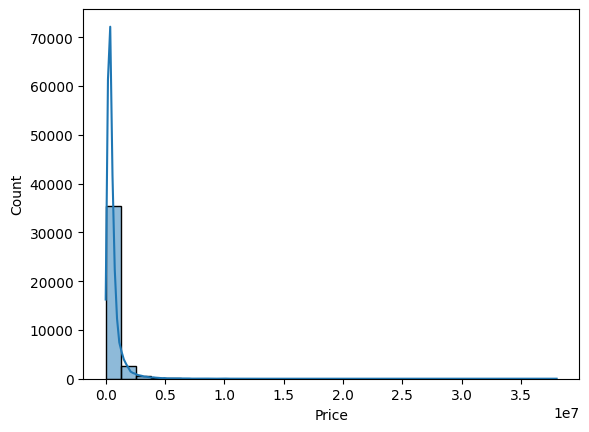

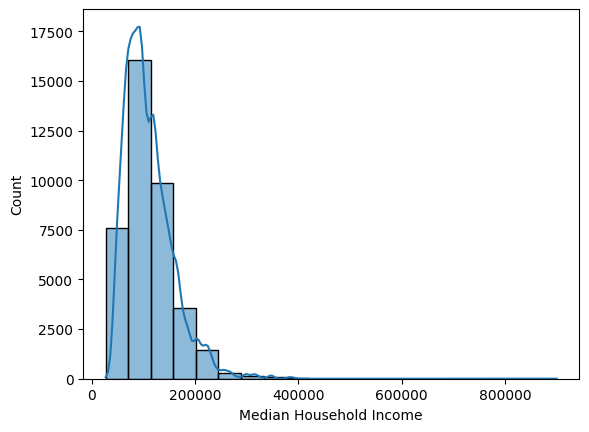

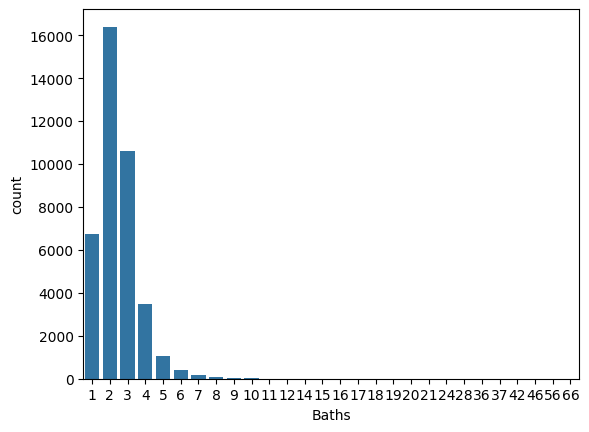

In [10]:
# Display the frequency distrbution of Living space
sns.histplot(x=Y, bins=30, kde=True)
plt.show()

# Display the frequency distrbution of Median house hold income 
sns.histplot(x=X['Median Household Income'], bins=20, kde=True)
plt.show()

# Display the frequency distrbution of number of baths 
sns.countplot(x=X['Baths'])
plt.show()

## Insights of Histograms 
- For each of the features, their are a large number of smaller values and very smaller number of larger values.
- The very high incomes that have a very low frequency can indicate people such as celebrities, athletes, or even CEO's.
- This could be a possible indiction of outliers in the data. 

In [13]:
# Apply log-transformation to the target feature
Y_log = np.log(Y)

# Split the data into 80% training and 20% testing data 
x_train, x_test, y_train, y_test = train_test_split(X, Y_log, test_size=0.2, random_state=42)